In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir('Colab Notebooks')  # if it's inside a folder
!ls


 Capstone				'Lab3_ Naji_Vin (Q7 and 8).ipynb'  'Updated Milestone 2'
'Copy of Vin Naji IT7103.ipynb'		'Lab 5'				   'Vin Naji IT7103.ipynb'
'Lab 3_Naji_Vin.ipynb'			'Milestone 2'
'Lab 3_Naji_Vin (Q4, Q7 and Q8).ipynb'	'Milestone 3'


In [ ]:
import os
os.chdir('Milestone 3')
!ls


 Final_merged_dataset.csv  'Temporal Analysis Milestone 3.ipynb'


In [ ]:
import pandas as pd

df = pd.read_csv('Final_merged_dataset.csv')
df.head()


,Latitude,Longitude,Date,Temp_celsius,Precip_mm,Land_Cover_Description
0,19.3437,-96.4642,2017-10,27.87,195.2,Cropland/Natural Vegetation Mosaic
1,19.3437,-96.4642,2017-10,27.87,195.2,Cropland/Natural Vegetation Mosaic
2,19.3437,-96.4642,2017-10,27.87,195.2,Cropland/Natural Vegetation Mosaic
3,19.3437,-96.4642,2017-10,27.87,195.2,Cropland/Natural Vegetation Mosaic
4,19.3437,-96.4642,2017-10,27.87,195.2,Cropland/Natural Vegetation Mosaic


In [ ]:
# Convert to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df[['Date', 'Year', 'Month']].head()


,Date,Year,Month
0,2017-10-01,2017,10
1,2017-10-01,2017,10
2,2017-10-01,2017,10
3,2017-10-01,2017,10
4,2017-10-01,2017,10


<ipython-input-10-f1cbda6d3b51>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Year', y='Month', ci='sd')


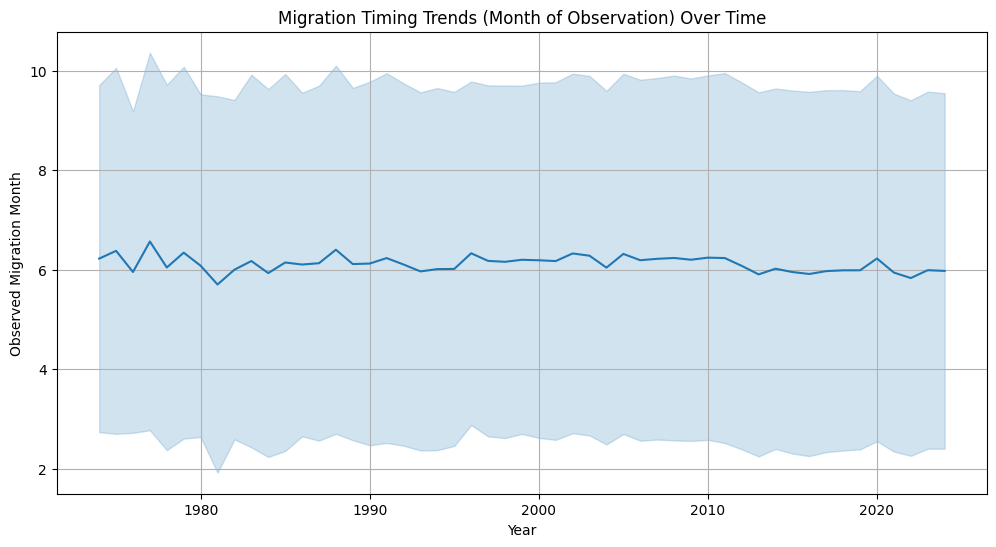

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Month', ci='sd')
plt.title('Migration Timing Trends (Month of Observation) Over Time')
plt.xlabel('Year')
plt.ylabel('Observed Migration Month')
plt.grid(True)
plt.show()


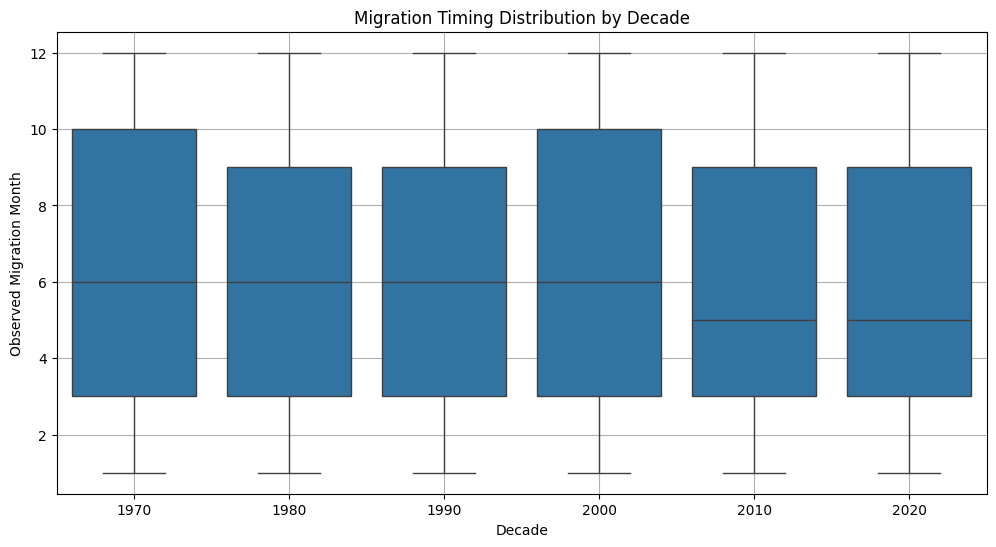

In [ ]:
df['Decade'] = (df['Year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Decade', y='Month')
plt.title('Migration Timing Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Observed Migration Month')
plt.grid(True)
plt.show()


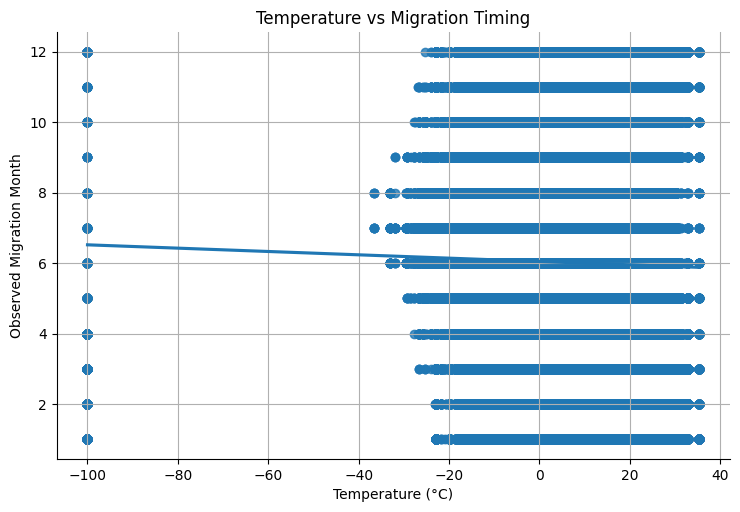

In [ ]:
sns.lmplot(data=df, x='Temp_celsius', y='Month', aspect=1.5)
plt.title('Temperature vs Migration Timing')
plt.xlabel('Temperature (°C)')
plt.ylabel('Observed Migration Month')
plt.grid(True)
plt.show()


<ipython-input-13-8630603cae07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df, x='Decade', y='Slope', palette='magma')


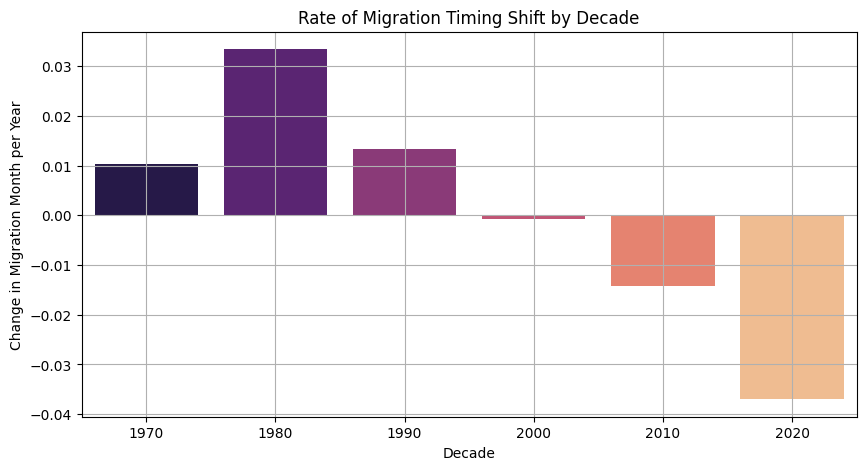

In [ ]:
from scipy.stats import linregress

trend_data = []

for decade in df['Decade'].unique():
    subset = df[df['Decade'] == decade]
    slope, intercept, _, _, _ = linregress(subset['Year'], subset['Month'])
    trend_data.append((decade, slope))

trend_df = pd.DataFrame(trend_data, columns=['Decade', 'Slope'])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=trend_df, x='Decade', y='Slope', palette='magma')
plt.title('Rate of Migration Timing Shift by Decade')
plt.ylabel('Change in Migration Month per Year')
plt.grid(True)
plt.show()


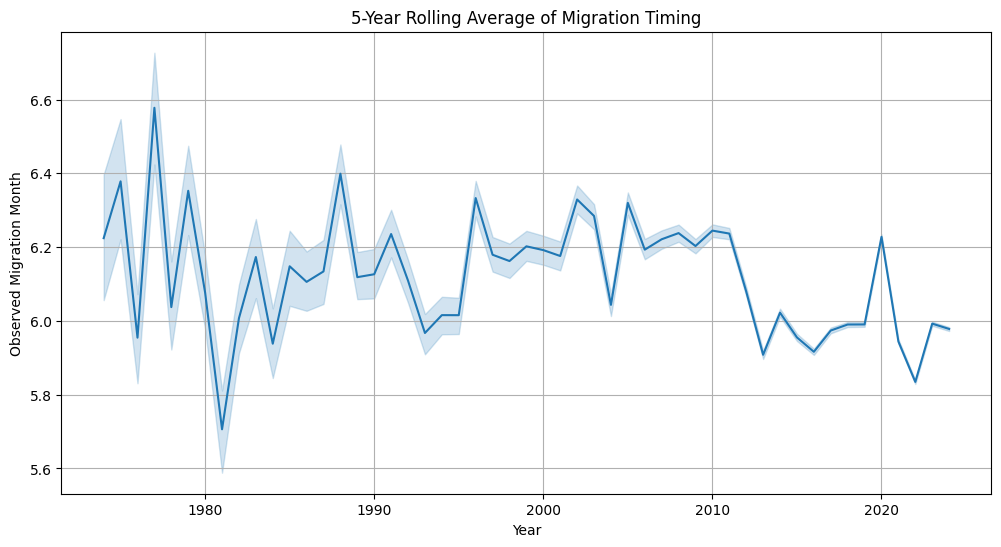

In [ ]:
df_sorted = df.sort_values('Year')
df_sorted['RollingMean'] = df_sorted['Month'].rolling(window=5).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_sorted, x='Year', y='RollingMean')
plt.title('5-Year Rolling Average of Migration Timing')
plt.ylabel('Observed Migration Month')
plt.grid(True)
plt.show()


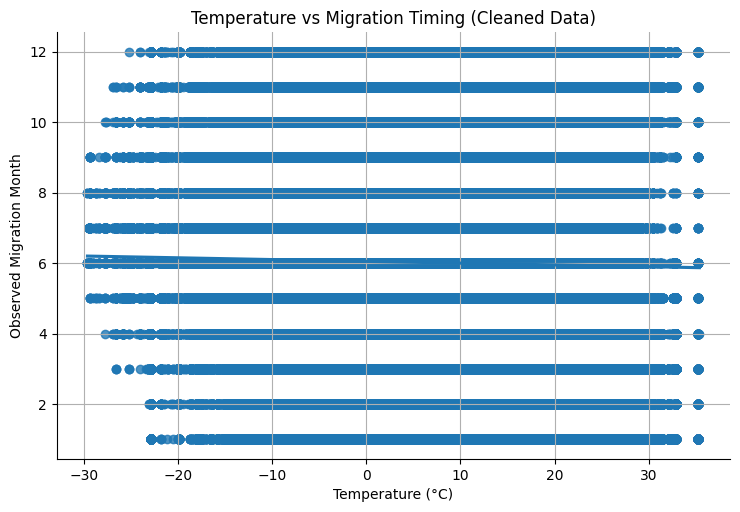

In [ ]:
# Filter out unrealistic temperature values
df_clean = df[(df['Temp_celsius'] > -30) & (df['Temp_celsius'] < 50)]

# Re-plot
sns.lmplot(data=df_clean, x='Temp_celsius', y='Month', aspect=1.5)
plt.title('Temperature vs Migration Timing (Cleaned Data)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Observed Migration Month')
plt.grid(True)
plt.show()


<ipython-input-16-662d23b9c26f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df, x='Decade', y='Slope', palette='magma')


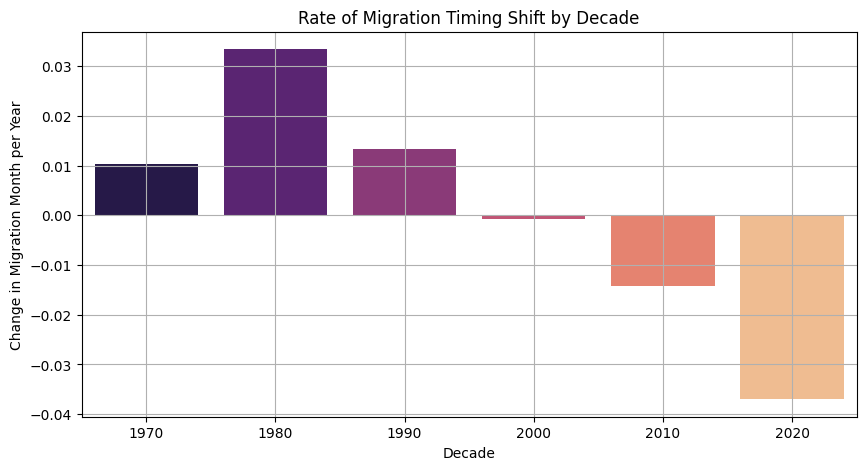

In [ ]:
from scipy.stats import linregress

# Create an empty list to store (decade, slope)
trend_data = []

# Loop through each decade
for decade in sorted(df['Decade'].unique()):
    subset = df[df['Decade'] == decade]
    if len(subset) >= 2:  # Only run regression if we have enough data
        slope, intercept, r_value, p_value, std_err = linregress(subset['Year'], subset['Month'])
        trend_data.append((decade, slope))

# Create DataFrame
trend_df = pd.DataFrame(trend_data, columns=['Decade', 'Slope'])

# Plot slope per decade
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=trend_df, x='Decade', y='Slope', palette='magma')
plt.title('Rate of Migration Timing Shift by Decade')
plt.ylabel('Change in Migration Month per Year')
plt.xlabel('Decade')
plt.grid(True)
plt.show()
